<a href="https://colab.research.google.com/github/vitch07/vitch07/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
!pip install numpy pandas scikit-learn mlflow streamlit ngrok

In [73]:
print("Feature names:", data.feature_names)  # Names of all features
print("Target names:", data.target_names)

Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names: ['malignant' 'benign']


In [74]:
type(data)

sklearn.utils._bunch.Bunch

In [50]:
import pandas as pd
df = pd.DataFrame(data.data, columns= data.feature_names)
df['Target'] = data.target
display(df.head(20))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,0


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# View scaled data
df_scaled = pd.DataFrame(X_train_scaled, columns=data.feature_names)
df_scaled['target'] = y_train  # Add target column

print("\nFirst 5 rows (scaled):")
display(df_scaled.head())


First 5 rows (scaled):


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,-1.440753,-0.435319,-1.362085,-1.139118,0.780573,0.718921,2.823135,-0.119150,1.092662,2.458173,...,-0.476309,-1.247920,-0.973968,0.722894,1.186732,4.672828,0.932012,2.097242,1.886450,1
1,1.974096,1.733026,2.091672,1.851973,1.319843,3.426275,2.013112,2.665032,2.127004,1.558396,...,1.311279,2.081617,2.137405,0.761928,3.265601,1.928621,2.698947,1.891161,2.497838,0
2,-1.399982,-1.249622,-1.345209,-1.109785,-1.332645,-0.307355,-0.365558,-0.696502,1.930333,0.954379,...,-1.040811,-1.245220,-0.999715,-1.438693,-0.548564,-0.644911,-0.970239,0.597602,0.057894,1
3,-0.981797,1.416222,-0.982587,-0.866944,0.059390,-0.596788,-0.820203,-0.845115,0.313264,0.074041,...,1.593530,-0.873572,-0.742947,0.796624,-0.729392,-0.774950,-0.809483,0.798928,-0.134497,1
4,-1.117700,-1.010259,-1.125002,-0.965942,1.269511,-0.439002,-0.983341,-0.930600,3.394436,0.950213,...,-1.334616,-1.117138,-0.896549,-0.174876,-0.995079,-1.209146,-1.354582,1.033544,-0.205732,1


In [52]:
print("Mean (should be ~0):", X_train_scaled.mean(axis=0))
print("Std (should be ~1):", X_train_scaled.std(axis=0))

Mean (should be ~0): [-1.82418183e-15 -3.36348775e-15 -3.60078268e-15 -2.62793450e-16
 -4.26667249e-15  1.00334881e-15  9.78216287e-16  5.78047988e-16
 -5.91846474e-15 -3.34799343e-15  8.53529701e-16 -7.47387500e-16
  7.52023596e-16  1.56163239e-17 -1.45012207e-15 -2.40149780e-15
  2.34732868e-16  3.27942801e-16 -3.14058913e-15  5.05090475e-16
  1.38741277e-15 -8.83298318e-17 -8.64509929e-16 -2.01596981e-15
  1.19318475e-15 -5.90492246e-16 -5.97568393e-16  1.08338247e-16
  4.78859931e-16 -2.32854029e-15]
Std (should be ~1): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [53]:
print("\nClass distribution (train set):")
print(pd.Series(y_train).value_counts())

print("\nClass distribution (test set):")
print(pd.Series(y_test).value_counts())


Class distribution (train set):
1    286
0    169
Name: count, dtype: int64

Class distribution (test set):
1    71
0    43
Name: count, dtype: int64


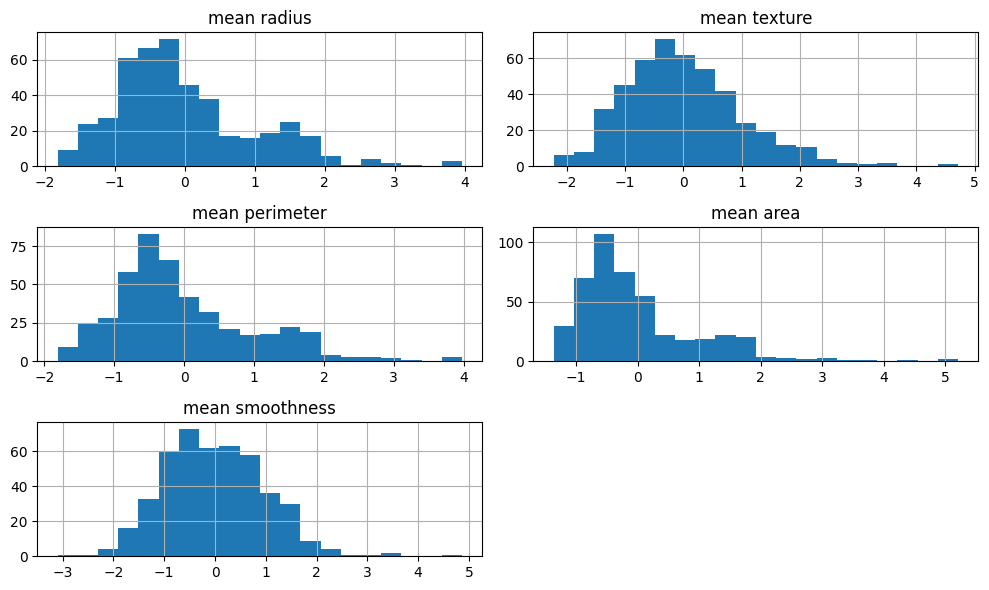

In [54]:
import matplotlib.pyplot as plt

# Plot histograms of the first 5 features
df_scaled.iloc[:, :5].hist(figsize=(10, 6), bins=20)
plt.tight_layout()
plt.show()

In [55]:
from sklearn.neural_network import MLPClassifier

# Initialize MLP with 2 hidden layers (e.g., 64 → 32 neurons)
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),  # 2 Dense layers: 64 → 32 neurons
    activation='relu',            # ReLU activation (best for hidden layers)
    solver='adam',                # Optimizer (adaptive momentum)
    max_iter=500,                 # Maximum training iterations
    random_state=42,
    verbose=True                  # Print training progress
)

# Train the model
mlp.fit(X_train, y_train)

Iteration 1, loss = 13.38767110
Iteration 2, loss = 12.37071035
Iteration 3, loss = 4.60667424
Iteration 4, loss = 14.49465934
Iteration 5, loss = 12.58848558
Iteration 6, loss = 3.59619435
Iteration 7, loss = 2.84342457
Iteration 8, loss = 4.42430872
Iteration 9, loss = 0.55724361
Iteration 10, loss = 1.79567438
Iteration 11, loss = 1.71877364
Iteration 12, loss = 0.33010924
Iteration 13, loss = 1.11357224
Iteration 14, loss = 1.00934366
Iteration 15, loss = 0.46470819
Iteration 16, loss = 0.51811252
Iteration 17, loss = 0.48016410
Iteration 18, loss = 0.35786872
Iteration 19, loss = 0.41065042
Iteration 20, loss = 0.37915657
Iteration 21, loss = 0.35018356
Iteration 22, loss = 0.36841019
Iteration 23, loss = 0.33600097
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42,
              verbose=True)

In [56]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions
y_pred = mlp.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        43
      benign       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix:
[[40  3]
 [ 2 69]]


In [57]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(64, 32), (128, 64)],  # Test different architectures
    'alpha': [0.0001, 0.001],  # L2 regularization strength
}

grid = GridSearchCV(MLPClassifier(max_iter=500), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)

Best parameters: {'alpha': 0.001, 'hidden_layer_sizes': (128, 64)}


In [58]:
import joblib

joblib.dump(mlp, 'mlp_2layer_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

#WebPart

In [ ]:
import streamlit as st
import joblib
import numpy as np

# Load model and scaler
mlp = joblib.load('mlp_2layer_model.pkl')
scaler = joblib.load('scaler.pkl')

st.title("Breast Cancer Predictor (2-Layer MLP)")

# Input fields for features
inputs = []
for i, feature in enumerate(data.feature_names):
    val = st.number_input(f"{feature}", value=float(X_train[:, i].mean()))
    inputs.append(val)

if st.button("Predict"):
    inputs_scaled = scaler.transform([inputs])
    prediction = mlp.predict(inputs_scaled)
    st.success(f"Prediction: {'Malignant' if prediction[0] == 0 else 'Benign'}")

In [ ]:
# !pip install streamlit
# !pip install pyngrok


In [76]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np
from sklearn import datasets  # You missed this in your code

# Load model and scaler
mlp = joblib.load('mlp_2layer_model.pkl')
scaler = joblib.load('scaler.pkl')

# Load the dataset (this was missing)
data = datasets.load_breast_cancer()
X_train = data.data

st.title("Breast Cancer Predictor (2-Layer MLP)")

# Input fields for features
inputs = []
for i, feature in enumerate(data.feature_names):
    val = st.number_input(f"{feature}", value=float(X_train[:, i].mean()))
    inputs.append(val)

if st.button("Predict"):
    inputs_scaled = scaler.transform([inputs])
    prediction = mlp.predict(inputs_scaled)
    st.success(f"Prediction: {'Malignant' if prediction[0] == 0 else 'Benign'}")


Writing app.py


In [80]:
import subprocess

# Start the Streamlit app
process = subprocess.Popen(["streamlit", "run", "app.py"])

In [83]:
from pyngrok import ngrok

# 1. Set your ngrok authtoken (mandatory)
ngrok.set_auth_token("2wHKJd9vPzczZkgRrRAXgFqSeOi_6HTvTjoSGRQkF4py4w8Mi")

# 2. Start tunnel properly
public_url = ngrok.connect(addr="8501", bind_tls=True)
print("Streamlit URL:", public_url)


Streamlit URL: NgrokTunnel: "https://d43a-34-139-181-11.ngrok-free.app" -> "http://localhost:8501"
